In [2]:
def f(x):
    return x

In [3]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [4]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

In [5]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [7]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [8]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [12]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

In [15]:
int_range = widgets.IntSlider()
display(int_range)

def on_value_change(change):
    print(change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0)

In [16]:
caption = widgets.Label(value='The values of slider1 and slider2 are synchronized')
sliders1, slider2 = widgets.IntSlider(description='Slider 1'),\
                    widgets.IntSlider(description='Slider 2')
l = widgets.link((sliders1, 'value'), (slider2, 'value'))
display(caption, sliders1, slider2)

Label(value='The values of slider1 and slider2 are synchronized')

IntSlider(value=0, description='Slider 1')

IntSlider(value=0, description='Slider 2')

In [17]:
import threading
from IPython.display import display
import ipywidgets as widgets
import time
progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)

def work(progress):
    total = 100
    for i in range(total):
        time.sleep(0.2)
        progress.value = float(i+1)/total

thread = threading.Thread(target=work, args=(progress,))
display(progress)
thread.start()

FloatProgress(value=0.0, max=1.0)

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [20]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [21]:
import pandas as pd
import seaborn as sns
from ficus import FigureManager
from IPython.display import FileLink
import glob
import os
from collections import OrderedDict

In [29]:
from bqplot import *
import numpy as np
import pandas as pd
from ipywidgets import Layout

In [22]:
transrate_files = glob.glob('/work/boink/work/mmetsp_transrate/*.assemblies.csv')

In [23]:
transrate_scores = {}
for abs_filename in transrate_files:
    mmetsp_name = os.path.basename(abs_filename).split('.')[0]
    transrate_scores[mmetsp_name] = pd.read_csv(abs_filename)

In [24]:
project_dirs = glob.glob('MMETSP/unode_meta/*')
project_names = [os.path.basename(d) for d in project_dirs]

In [25]:
project_data = OrderedDict()
for project_name, project_dir in zip(project_names, project_dirs):
    if project_name not in transrate_scores:
        continue
    data_file = os.path.join(project_dir, 'unode_meta.csv')
    if os.path.isfile(data_file):
        mtime = datetime.datetime.fromtimestamp(os.path.getmtime(data_file)).strftime("%Y-%m-%d-%H:%M")
        project_data[project_name] = pd.read_csv(data_file)
        if "4-20" in mtime:
            project_data[project_name].bfsize = '8e9'
        else:
            project_data[project_name].bfsize = '3e9'

In [26]:
meta_cols = ['full', 'tip', 'island', 'trivial']

In [27]:
for name, data in project_data.items():
    data['read_n'] = data.index
    data['t'] = data['read_n'] / data['read_n'].max()
    for col in meta_cols:
        data[col + '_p'] = data[col] / data['n_unodes']
    data['dnode_p'] = data['n_dnodes'] / (data['n_unodes'] + data['n_dnodes'])
prop_cols = [col + '_p' for col in meta_cols] + ['dnode_p']

In [34]:
data = project_data['MMETSP1059']

In [36]:
x_sc = LinearScale()
y_sc = LinearScale()

colors = []
labels = []
y_data = []
mapping = {}

for name, data in project_data.items():
    labels.extend([name] * len(prop_cols))
    colors.extend([next(color_cycle)['color'] for _ in prop_cols])
    y_data
    

line_chart = Lines(x=data['t'], y=data[prop_cols].T, scales= {'x': x_sc, 'y': y_sc})

ax_x = Axis(scale=x_sc)
ax_y = Axis(scale=y_sc, orientation='vertical')

Figure(marks=[line_chart], axes=[ax_x, ax_y])

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

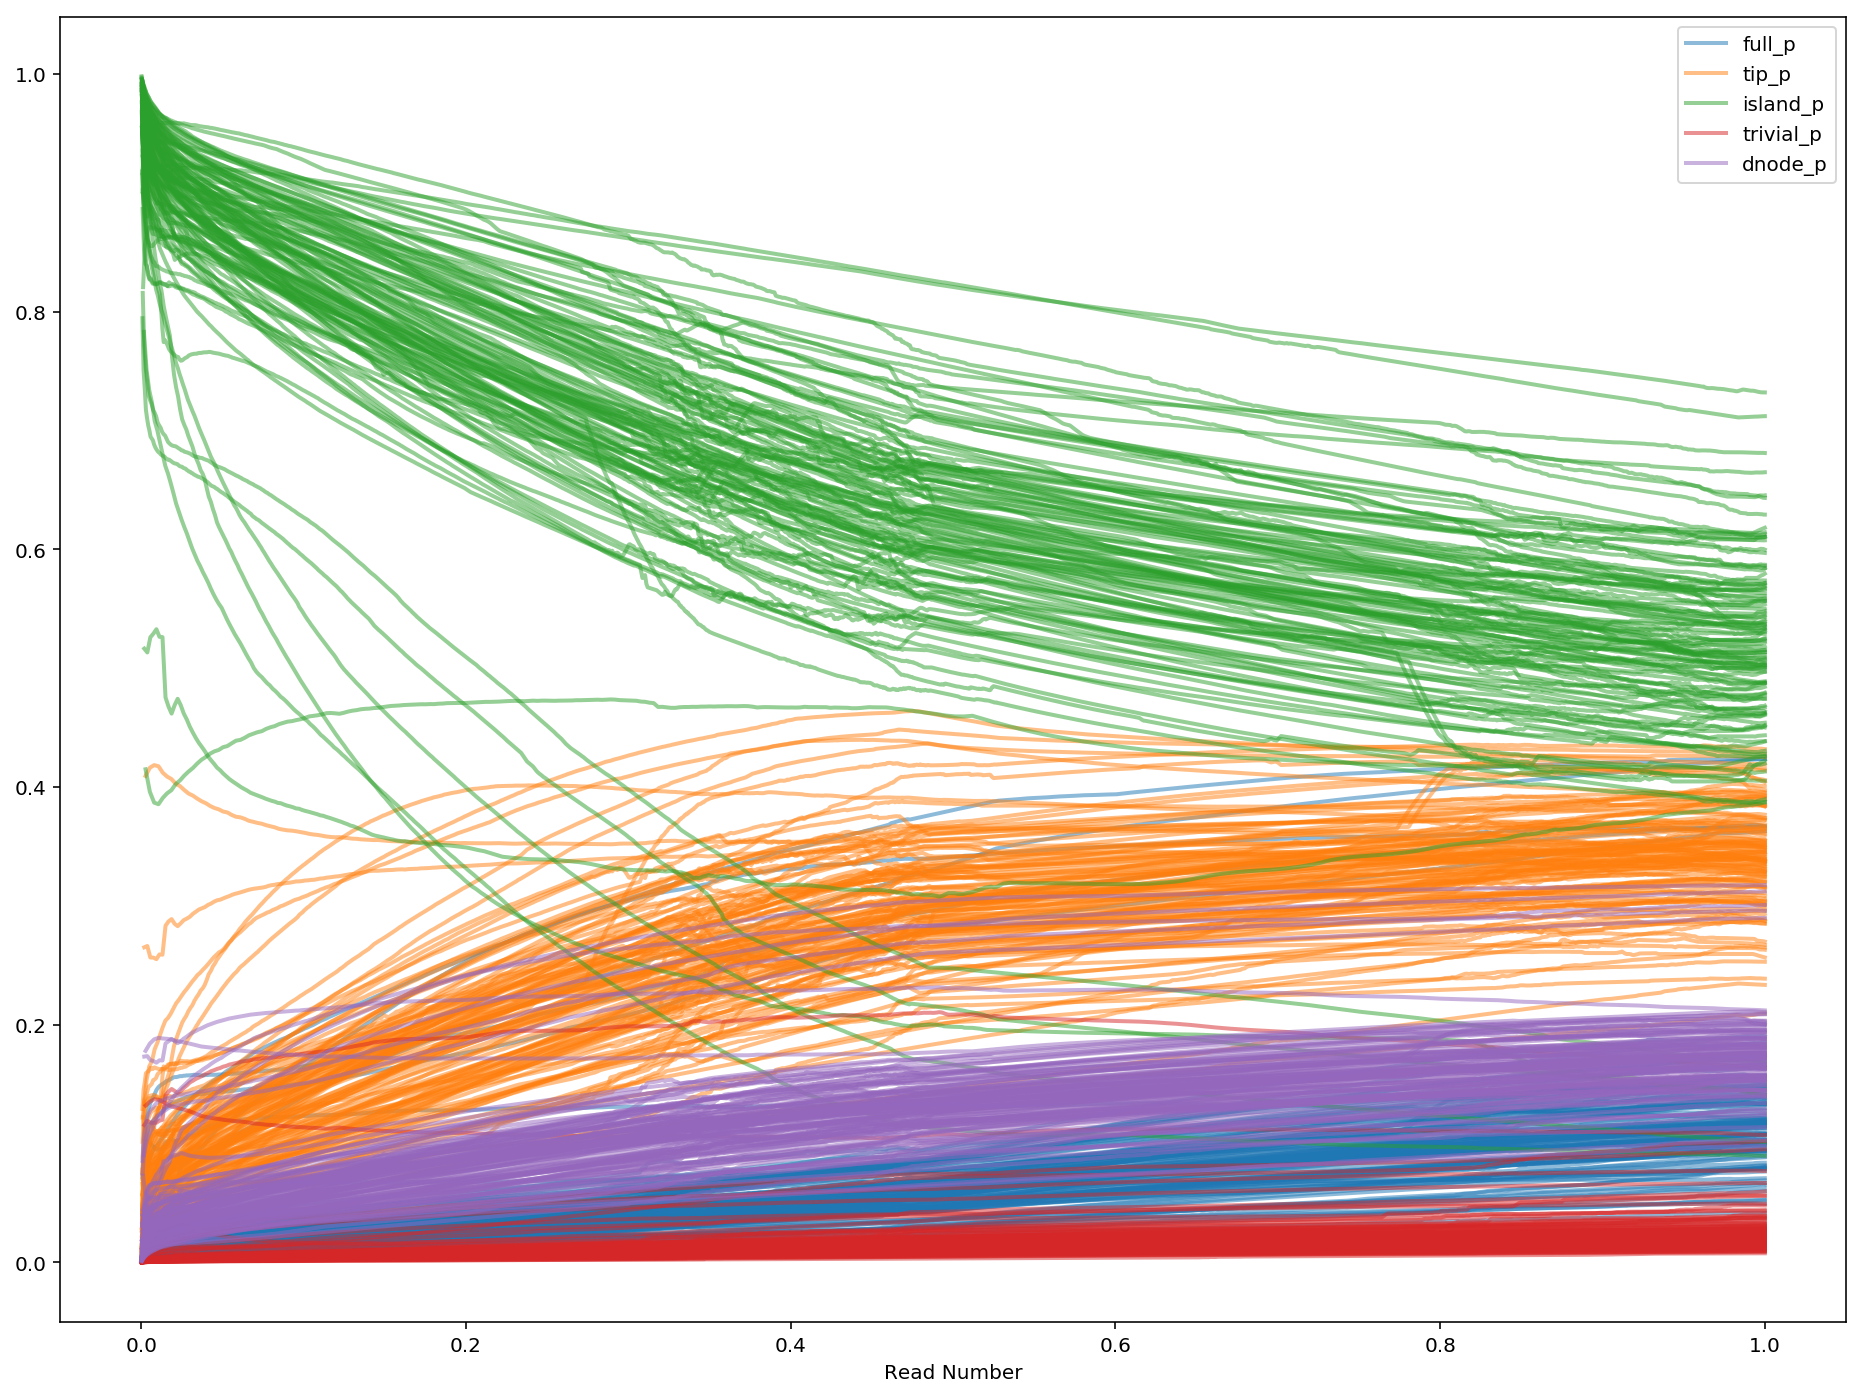

/work/boink/work/MMETSP.unode_meta.png

In [28]:
with FigureManager(filename='MMETSP.unode_meta.png', figsize=(16,12), show=True) as (fig, ax):
    color_cycle = ax._get_lines.prop_cycler
    
    for col in prop_cols:
        color = next(color_cycle)['color']
        for name, data in project_data.items():
            ax.plot(data['t'], data[col], lw=2, alpha=.5, c=color, label=col)
             #         title='Proportion of Unitig-Node Types')
    ax.set_xlabel('Read Number')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    
FileLink('MMETSP.unode_meta.png')